# Project 2: What kind of wine is this?
## SGD route 2/4

In [40]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [41]:
train = pd.read_parquet("s3://ling583/wine-train.parquet", storage_options={"anon": True})
test = pd.read_parquet("s3://ling583/wine-test.parquet", storage_options={"anon": True})

In [42]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [43]:
# we didnt have to import spacy since what we need gets brought in through this pickle
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [44]:
sgd

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.7763, min_df=5,
                                 preprocessor=<cyfunction identity at 0x7f88c39e52b0>,
                                 tokenizer=<function tokenize at 0x7f8849110e50>)),
                ('tfidftransformer', TfidfTransformer()),
                ('sgdclassifier', SGDClassifier(alpha=1.14e-05))])

In [45]:
predicted = sgd.predict(test["review_text"])
print(classification_report(test["wine_variant"], predicted))

                    precision    recall  f1-score   support

Cabernet Sauvignon       0.69      0.83      0.75      7558
        Chardonnay       0.82      0.85      0.84      4861
            Merlot       0.82      0.33      0.48      1381
        Pinot Noir       0.77      0.87      0.82      9618
          Riesling       0.80      0.79      0.80      2421
   Sauvignon Blanc       0.84      0.66      0.74      1278
             Syrah       0.75      0.54      0.63      3426
         Zinfandel       0.86      0.51      0.64      2082

          accuracy                           0.76     32625
         macro avg       0.80      0.67      0.71     32625
      weighted avg       0.77      0.76      0.76     32625



---

## Confusion matrix
How often labels are confused with each other
Rows are the correct labels
Columns are the predicted labels

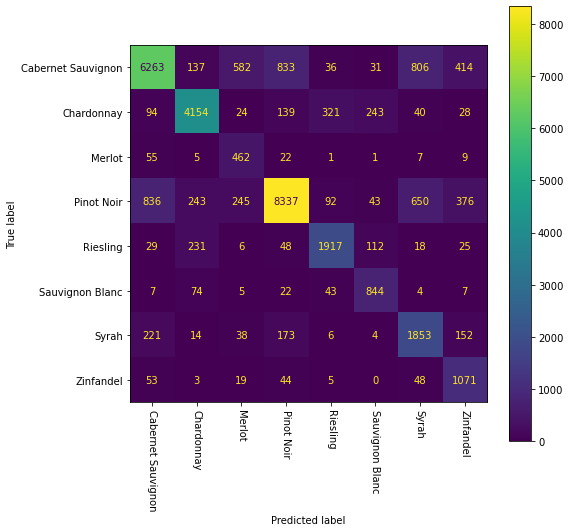

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(sgd, test['wine_variant'], predicted, xticks_rotation=-90, ax=ax)

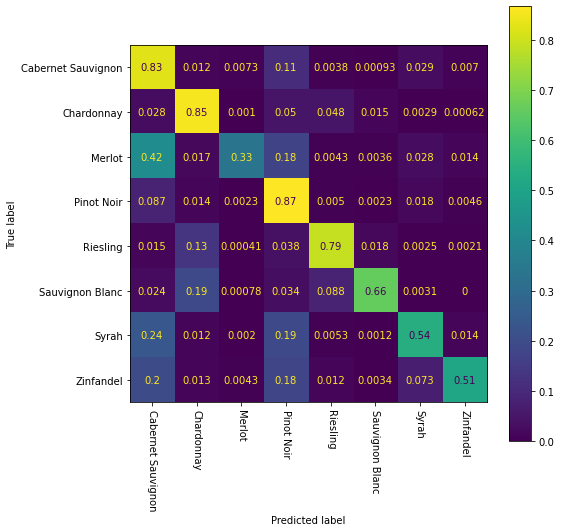

In [47]:
# Normalize by the rows to see percentages
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(sgd, test["review_text"], test["wine_variant"], xticks_rotation=-90, normalize='true', ax=ax)

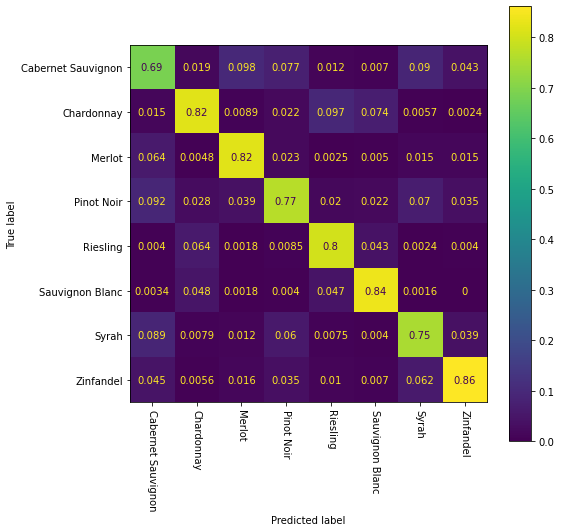

In [48]:
# Normalize by the columns
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(sgd, test["review_text"], test["wine_variant"], xticks_rotation=-90, normalize='pred', ax=ax)

----

## Errors

In [49]:
# Is Syrah, predicted to be Pinot Noir
err = test[(test['wine_variant']=='Syrah')&(predicted=='Pinot Noir')]
len(err)

650

In [50]:
err['review_text'].iloc[0]

'Beautiful and mature bouquet with black fruits and earthy impressions. On the palate red as well as black berry fruits. Quite much acidity. Mature tannin which still has a bite. Classical and concentrated wine. Ready now and the next few years.'

In [51]:
err['review_text'].iloc[1]

'Way too high in alcohol The nose does not show it, in fact the nose gives very nice spicy/bacony tones. But on the palate, way too hot. NOt my kind of wine.'

In [52]:
err['review_text'].iloc[2]

'Purple with a clear rim. Wooden floral nose, unusual amount of pomegranate. Entry of dark fruit. Not long and a bit thin on the mid-palate. Very savoury and quite tannic even a bit green.'

In [53]:
for t in err['review_text'].sample(10):
    print(t)
    print()

cherry pie, blueberry earth. great balance, good acitity, bright fruit- cherry, black pepper, spicy finish.

OMG this is awesome tonight!!! A bit tight at first, the second glass exploded with this pur fruit, dark leather and florest floor. Best showing I have seen of this wine. Well balanced and concnetrated, this wine will last well. Yum

Elegant red fruits , cinnamon and woodsy spice with classic olive notes. Still somewhat tight. I would hold 2-4- years.

No where near as nice as the first bottle I had of this. It was good, but didn't have the smooth complexity of the previous bottle, and it was way too sweet. Enjoyable certainly, but maybe some bottle variation or possibly this wine is in an odd place for my palate and needs a few more years.

Fresh nose of loamy earth and briary red fruits which faded a bit during the course of the evening. Flavors are pure and clean with intensity building toward the backpalate showing black cherry, smoke, cinnamon, white pepper and herb. Medium

In [54]:
err2 = test[(test['wine_variant']=='Cabernet Sauvignon')&(predicted=='Merlot')]
len(err2)

55

In [55]:
for t in err2['review_text'].sample(10):
    print(t)
    print()

Blood red. Nose of fruit - plum, raisin, some candied cherry. Lush, fruity opening with black fruits, some honey, chocolate and earth. As the wine opened, we got more earth, wet stone and leather. This will age well for at least 7 years.

Chocolate, tar, fruit -- but not as exuberant as in 2007. Pretty good pairing with our pasta (spaghetti with onion/garlic tomato sauce and thyme and our meatballs). Drink now

True to it`s region with the nice red fruit showing upfront and some green pepper and mint notes. Balanced and rounded but lacking complexity and depth.

Dark cherry, almost purple color. Honey, cherry, and a hint of leather on the nose. Nice balance of fruit. Smooth tannins - went well with hearty cheese.

Wow, was this good. Soft tannins, wonderful red fruit (with black raspberries). Bit oakier than I'd prefer, but this was pure liquid gold on my palate. Highly recommended.

Upon opening, an aroma of anchovies and ripe fruit, with some smokey qualities. Flavor of red fruit, wi